XY
Евклидово 5.830951894845301
Квадрат Евклидова 34.0
Взвешенное евклидово 5.0
Хеммингово 8.0
XZ
Евклидово 4.123105625617661
Квадрат Евклидова 17.0
Взвешенное евклидово 4.0
Хеммингово 5.0
XW
Евклидово 3.0
Квадрат Евклидова 9.0
Взвешенное евклидово 2.0
Хеммингово 5.0
YZ
Евклидово 5.196152422706632
Квадрат Евклидова 27.0
Взвешенное евклидово 5.0
Хеммингово 7.0
YW
Евклидово 4.123105625617661
Квадрат Евклидова 17.0
Взвешенное евклидово 3.0
Хеммингово 7.0
ZW
Евклидово 3.7416573867739413
Квадрат Евклидова 14.0
Взвешенное евклидово 3.0
Хеммингово 6.0


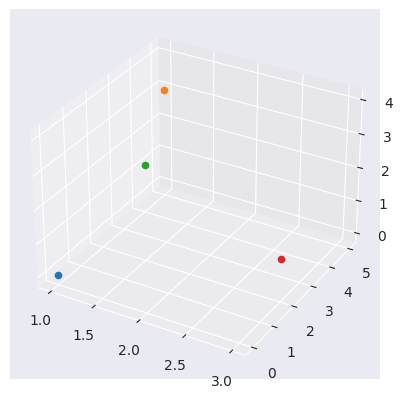

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 0, 0])
y = np.array([1, 5, 3])
z = np.array([2, 0, 4])
w = np.array([3, 2, 1])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*x)
ax.scatter(*y)
ax.scatter(*z)
ax.scatter(*w)

print('XY')
print('Евклидово', np.linalg.norm(x - y))
print('Квадрат Евклидова',np.linalg.norm(x - y) ** 2)
print('Взвешенное евклидово', np.linalg.norm(x - y, ord=np.inf))
print('Хеммингово', np.linalg.norm(x - y, ord=1))

print('XZ')
print('Евклидово', np.linalg.norm(x - z))
print('Квадрат Евклидова',np.linalg.norm(x - z) ** 2)
print('Взвешенное евклидово', np.linalg.norm(x - z, ord=np.inf))
print('Хеммингово', np.linalg.norm(x - z, ord=1))

print('XW')
print('Евклидово', np.linalg.norm(x - w))
print('Квадрат Евклидова',np.linalg.norm(x - w) ** 2)
print('Взвешенное евклидово', np.linalg.norm(x - w, ord=np.inf))
print('Хеммингово', np.linalg.norm(x - w, ord=1))

print('YZ')
print('Евклидово', np.linalg.norm(y - z))
print('Квадрат Евклидова',np.linalg.norm(y - z) ** 2)
print('Взвешенное евклидово', np.linalg.norm(y - z, ord=np.inf))
print('Хеммингово', np.linalg.norm(y - z, ord=1))

print('YW')
print('Евклидово', np.linalg.norm(y - w))
print('Квадрат Евклидова',np.linalg.norm(y - w) ** 2)
print('Взвешенное евклидово', np.linalg.norm(y - w, ord=np.inf))
print('Хеммингово', np.linalg.norm(y - w, ord=1))

print('ZW')
print('Евклидово', np.linalg.norm(z - w))
print('Квадрат Евклидова',np.linalg.norm(z - w) ** 2)
print('Взвешенное евклидово', np.linalg.norm(z - w, ord=np.inf))
print('Хеммингово', np.linalg.norm(z - w, ord=1))

In [2]:
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = sns.load_dataset('iris')
iris


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


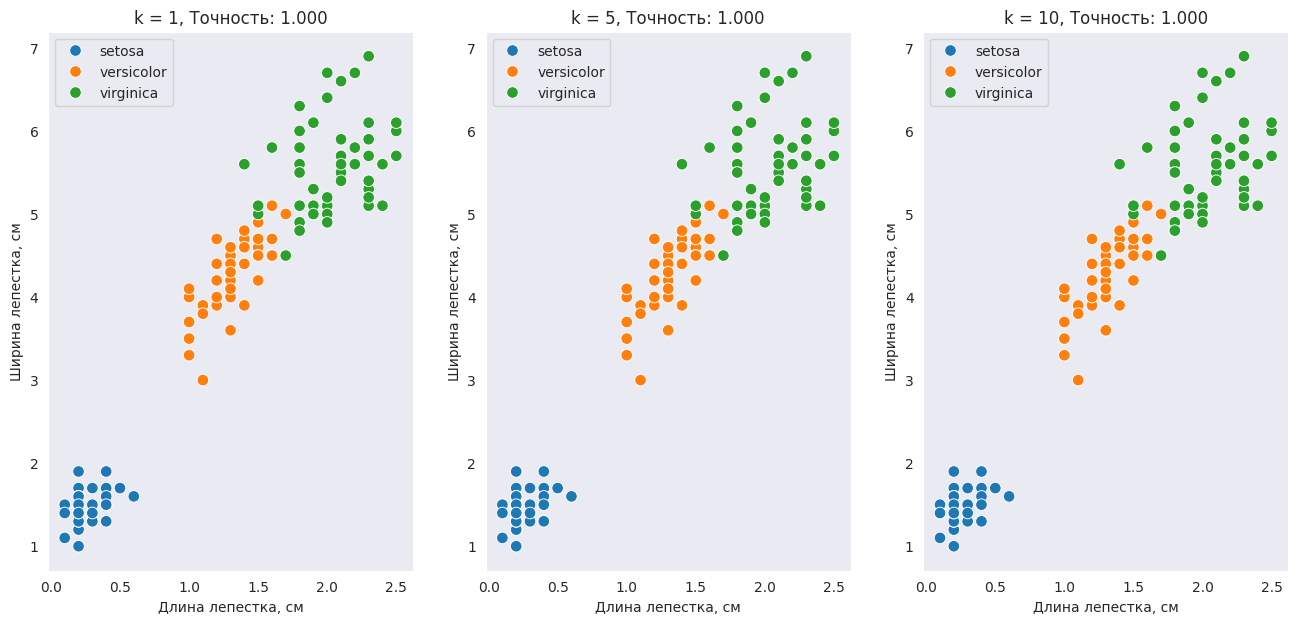

In [3]:

def experiment(k, test_size):
    X = iris.iloc[:, :-1]
    y = iris.iloc[:, -1]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    return accuracy
# Разные значения k
k_values = [1, 5, 10]

# Размер тестовой выборки (15%)
test_size = 0.15

# Создание графиков и оценка качества моделей
plt.figure(figsize=(16, 7))

for i, k in enumerate(k_values):
    plt.subplot(1, 3, i + 1)
    accuracy = experiment(k, test_size)

    # Постройте графики, чтобы визуально оценить границы решения для каждого k
    sns.scatterplot(
        data=iris,
        x='petal_width', y='petal_length',
        hue='species',
        s=70
    )
    plt.xlabel('Длина лепестка, см')
    plt.ylabel('Ширина лепестка, см')
    plt.title(f'k = {k}, Точность: {accuracy:.3f}')
    plt.legend()
    plt.grid()

plt.show()


In [4]:
import numpy as np

# Создаем список признаков для человека
features = [
    {"пол": "мужской", "возраст": 30, "цвет_глаз": "голубой"},
    {"пол": "женский", "возраст": 25, "цвет_глаз": "зеленый"},
    {"пол": "мужской", "возраст": 35, "цвет_глаз": "коричневый"}
]

# Создаем словари для преобразования категориальных признаков в числовые значения
gender_mapping = {"мужской": 0, "женский": 1}
eye_color_mapping = {"голубой": 0, "зеленый": 1, "коричневый": 2}

# Создаем пустую матрицу признаков
feature_matrix = []

# Преобразуем каждого человека в вектор признаков и добавляем его в матрицу
for person in features:
    feature_vector = [
        gender_mapping[person["пол"]],
        person["возраст"],
        eye_color_mapping[person["цвет_глаз"]]
    ]
    feature_matrix.append(feature_vector)

# Преобразуем матрицу признаков в массив NumPy
feature_matrix = np.array(feature_matrix)

# Выводим полученную матрицу признаков
print(feature_matrix)

[[ 0 30  0]
 [ 1 25  1]
 [ 0 35  2]]
